In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression



In [2]:
data=pd.read_csv("column_2C_weka.csv")

In [3]:
#If there is "Abnormal" return green else return "red"
color_list=["red" if i=="Abnormal" else "green" for i in data.loc[:,"class"]]

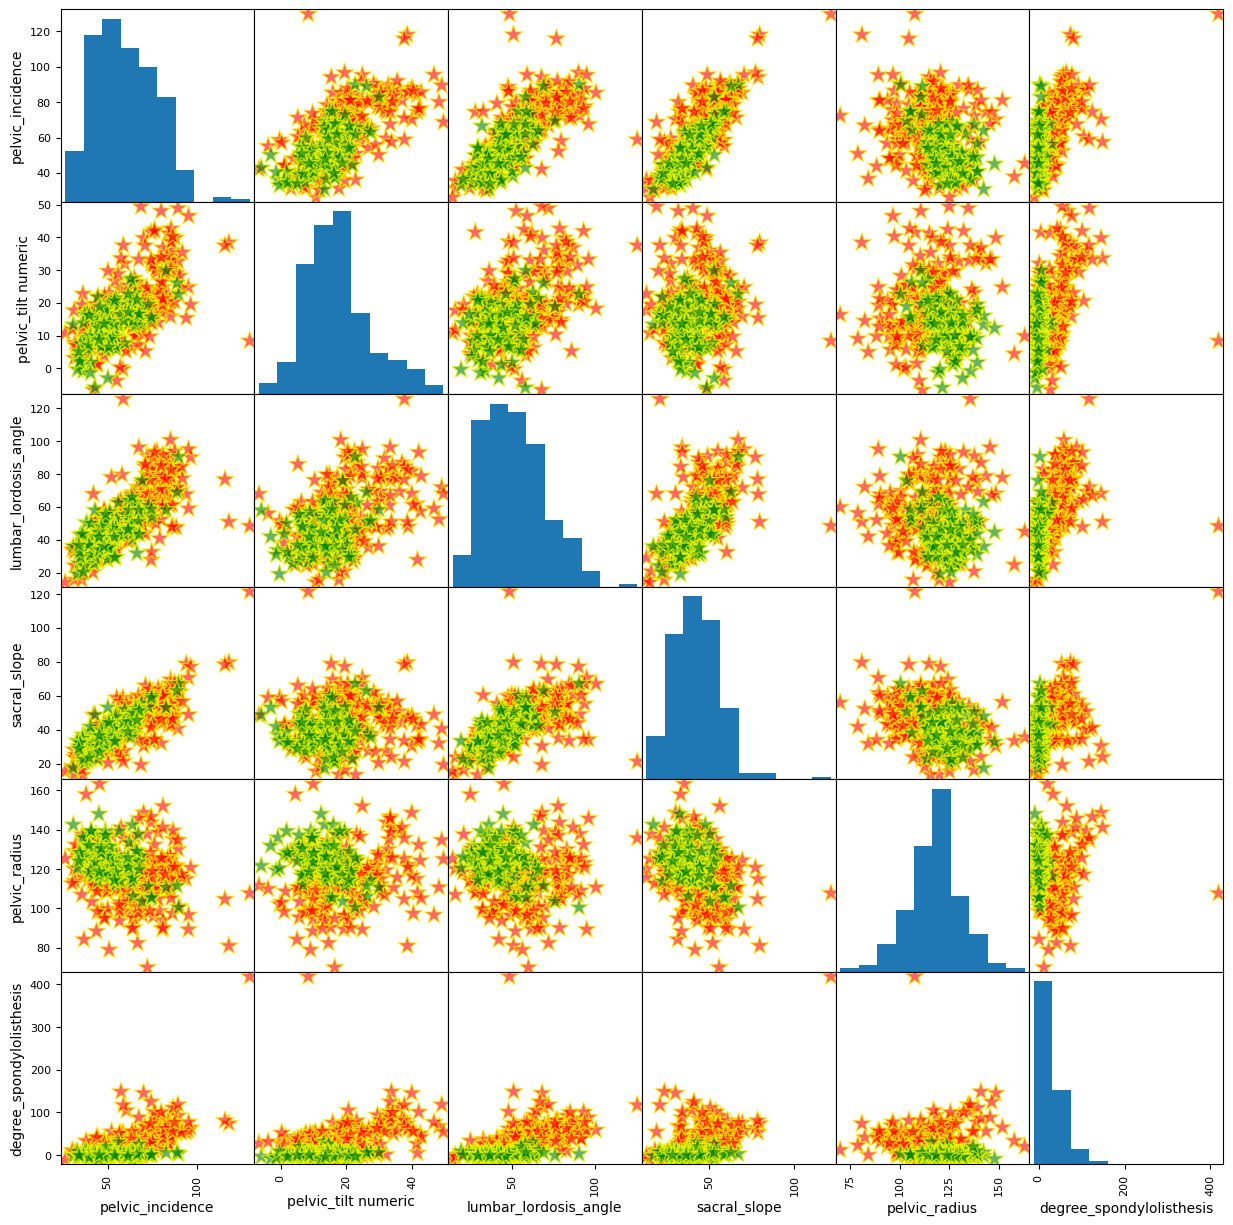

In [4]:
#return the all data set value number print scatter_matrix except class column
pd.plotting.scatter_matrix(data.loc[:,data.columns !="class"],#except class
                           c=color_list,#color 
                           figsize=[15,15],#chart size
                           diagonal="hist",#plot of histograms on the diagonal of the matrix
                           alpha=0.6,#transparency
                           s=200,#size of the point
                           marker="*",#the shape pf the points
                           edgecolor="yellow")#edge color

plt.show()

class
Abnormal    210
Normal      100
Name: count, dtype: int64

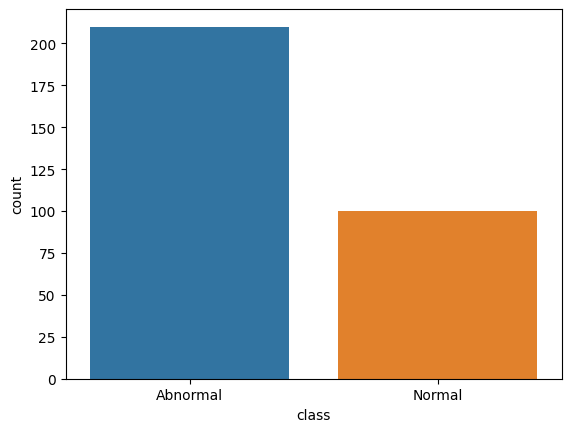

<Figure size 500x500 with 0 Axes>

In [5]:
sns.countplot(x="class",data=data)
plt.figure(figsize=(5,5))
data.loc[:,"class"].value_counts()

## Regression Model


In [6]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


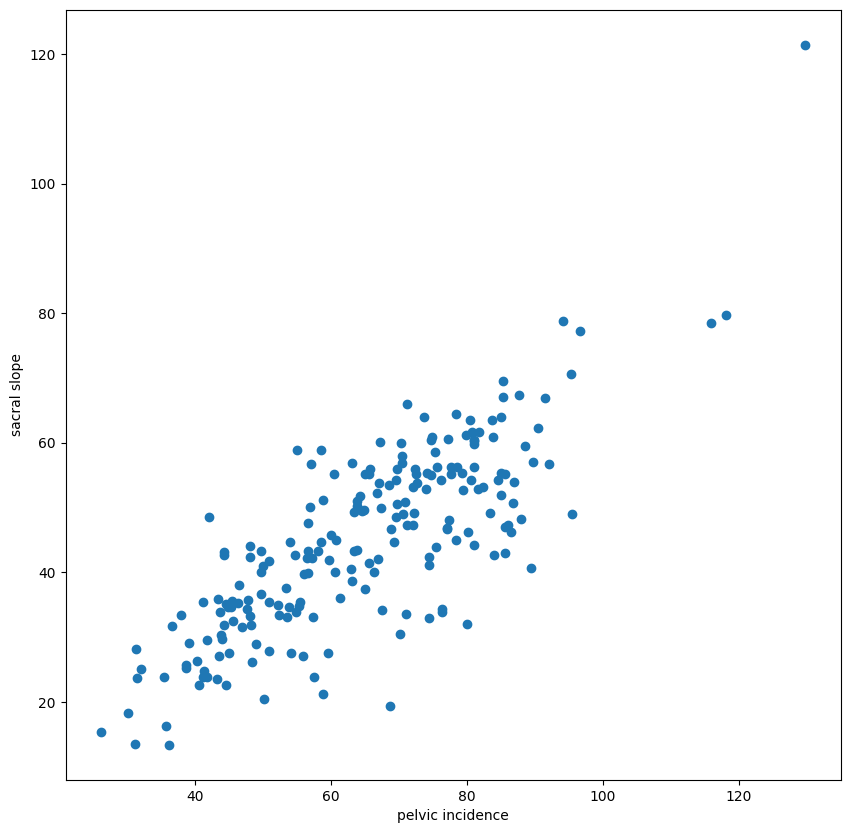

In [7]:
data1=data[data["class"]=="Abnormal"]#class column choosing "Abnormal"
x=np.array(data1.loc[:,"pelvic_incidence"]).reshape(-1,1)#2D x shape
y=np.array(data1.loc[:,"sacral_slope"]).reshape(-1,1)#2D y shape
#plot
plt.figure(figsize=(10,10))
plt.scatter(x=x,y=y)
plt.xlabel("pelvic incidence")
plt.ylabel("sacral slope")
plt.show()

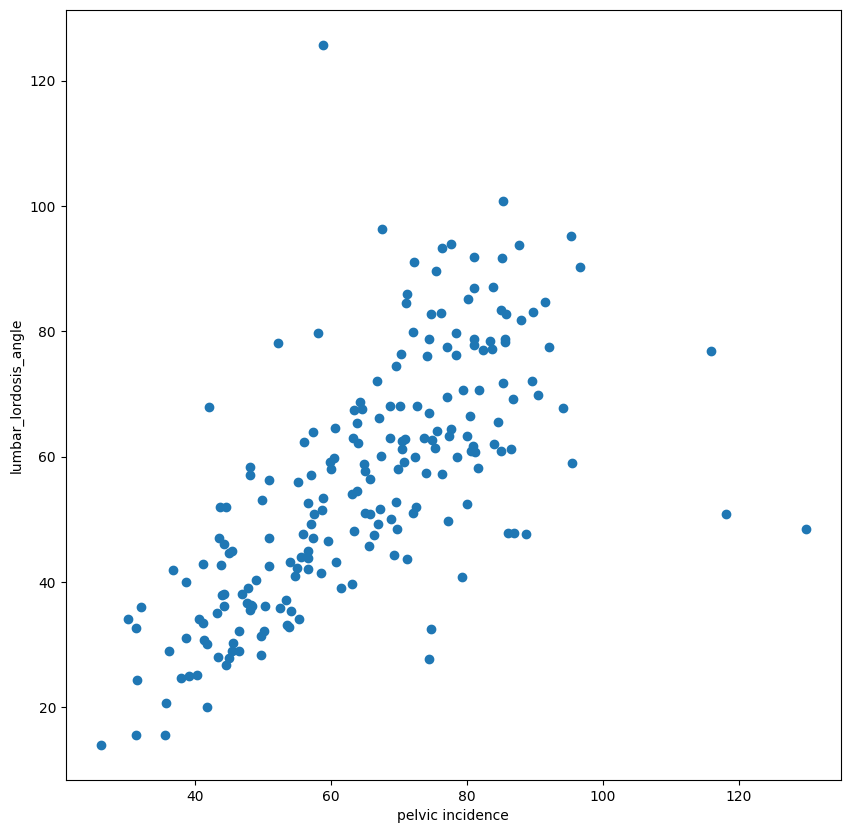

In [8]:
#show me figure pelvic_incidence and lumbar_lordosis_angle in class

data2=data[data["class"]=="Abnormal"]
#x and y shape
x=np.array(data2.loc[:,"pelvic_incidence"]).reshape(-1,1)
y=np.array(data2.loc[:,"lumbar_lordosis_angle"]).reshape(-1,1)
#plot
plt.figure(figsize=(10,10))
plt.scatter(x=x,y=y)
plt.xlabel("pelvic incidence")
plt.ylabel("lumbar_lordosis_angle")
plt.show()

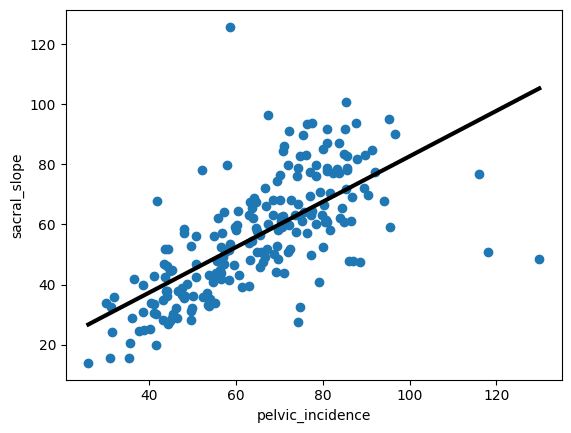

In [12]:
reg=LinearRegression() #called func
#predict type
predict_shape=np.linspace(min(x),max(x)).reshape(-1,1)
#fit 
reg.fit(x,y)
#predict
predicted=reg.predict(predict_shape)
#score
reg.score(x,y)
plt.plot(predict_shape,predicted,color="black",linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()
